# Explore here

In [23]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

# Your code here
import pandas as pd

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")
total_data.head(200)



,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
195,com.imangi.templerun2,nice game.... its simply amazing...but i woul...,1
196,com.imangi.templerun2,frozen world - changed stats i love this game...,0
197,com.imangi.templerun2,would give 5* if i could retrieve my previous...,0
198,com.imangi.templerun2,temple run 2 frozen shadows i love this game ...,0


In [45]:
def Precision_Omega(y_test_o, y_pred_o):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score

    # comprobaciones del modelo.
    print(f"Accuracy: {accuracy_score(y_test_o, y_pred_o):.4f}") # Precisión general del modelo
    print(f"Precision: {precision_score(y_test_o, y_pred_o):.4f}") # Mide la proporción de positivos reales entre los predichos como positivos
    print(f"Recall: {recall_score(y_test_o, y_pred_o):.4f}") # Evalúa qué porcentaje de casos positivos fueron correctamente identificados
    print(f"F1 Score: {f1_score(y_test_o, y_pred_o):.4f}") # Combina precisión y recall para una evaluación equilibrada
   
   #Metricas de Regresion
    #print(f"Error cuadrático medio: {mean_squared_error(y_test_o, y_pred_o)}")
    #print(f"Coeficiente de determinación: {r2_score(y_test_o, y_pred_o)}")


def Matriz_Confusion(y_test_o, y_pred_o):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_o, y_pred_o), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negativas', 'Positivas'], yticklabels=['Negativas', 'Positivas'])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()

In [25]:
total_data2=total_data.copy()

In [26]:
total_data2.drop(["package_name"], axis = 1, inplace = True)

In [27]:
total_data2.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [28]:
total_data2["review"] = total_data2["review"].str.strip().str.lower()

In [29]:
total_data2.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [30]:
#===============================================================================
#                      Mi Script Para El Split
#===============================================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = total_data2['review']
y = total_data2['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

vec_model = CountVectorizer(stop_words = "english")
X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()

In [32]:
X_train_vec.shape


(712, 3310)

In [33]:
X_test_vec.shape

(179, 3310)

## Entrenamiento del Modelo

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

*** GaussianNB

In [35]:
model_gaus = GaussianNB()
model_gaus.fit(X_train_vec, y_train)
y_pred_train_gaus = model_gaus.predict(X_train_vec)
y_pred_test_gaus = model_gaus.predict(X_test_vec)

Prediccion con los datos Training para ver su desempeño

Accuracy: 0.9860
Precision: 0.9621
Recall: 1.0000
F1 Score: 0.9807


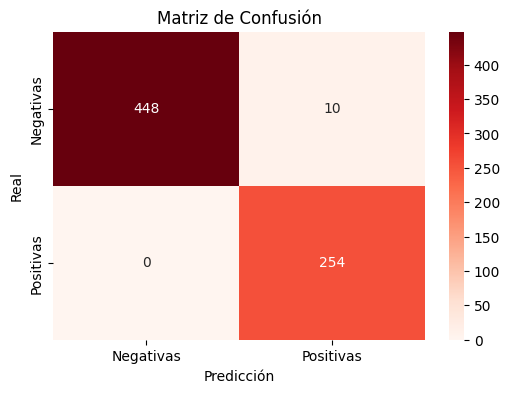

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


Precision_Omega(y_train, y_pred_train_gaus)
Matriz_Confusion(y_train, y_pred_train_gaus)

Prediccion con los datos Test

Accuracy: 0.8045
Precision: 0.6875
Recall: 0.6226
F1 Score: 0.6535


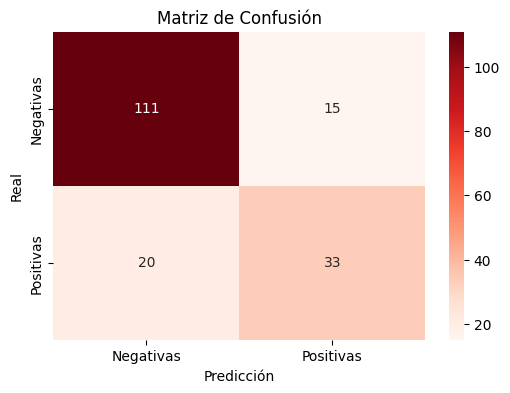

In [49]:
import seaborn as sns
Precision_Omega(y_test, y_pred_test_gaus)
Matriz_Confusion(y_test, y_pred_test_gaus)

*** MultinomialNB

In [55]:
model_multi = MultinomialNB()
model_multi.fit(X_train_vec, y_train)

y_pred_train_multi = model_multi.predict(X_train_vec)
y_pred_test_multi = model_multi.predict(X_test_vec)

Prediccion con los datos Training para ver su desempeño

Accuracy: 0.9607
Precision: 0.9556
Recall: 0.9331
F1 Score: 0.9442


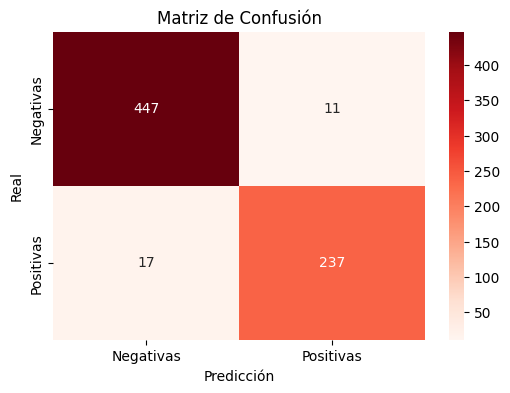

In [56]:
Precision_Omega(y_train, y_pred_train_multi)
Matriz_Confusion(y_train, y_pred_train_multi)

Prediccion con los datos Training para ver su desempeño

Accuracy: 0.8156
Precision: 0.7273
Recall: 0.6038
F1 Score: 0.6598


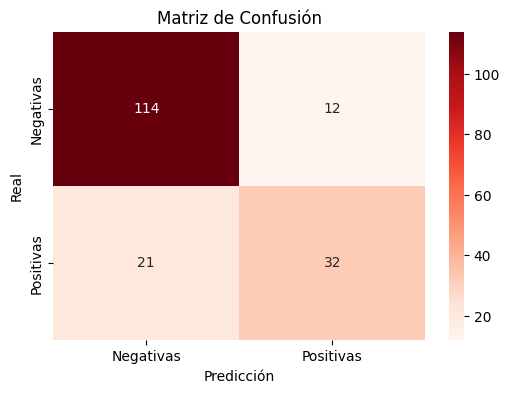

In [57]:
Precision_Omega(y_test, y_pred_test_multi)
Matriz_Confusion(y_test, y_pred_test_multi)

*** BernoulliNB ***

In [58]:
model_ber = BernoulliNB()
model_ber.fit(X_train_vec, y_train)
y_pred_train_Bernoulli = model_ber.predict(X_train_vec)
y_pred_test_Bernoulli = model_ber.predict(X_test_vec)

Prediccion con los datos Training para ver su desempeño

Accuracy: 0.9199
Precision: 0.9805
Recall: 0.7913
F1 Score: 0.8758


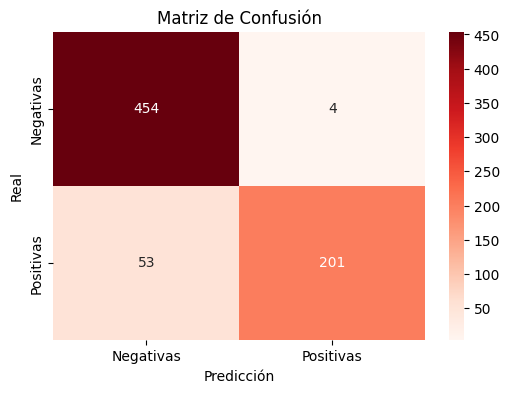

In [60]:
Precision_Omega(y_train, y_pred_train_Bernoulli)
Matriz_Confusion(y_train, y_pred_train_Bernoulli)

Prediccion con los datos Test para ver su desempeño

Accuracy: 0.7709
Precision: 0.7000
Recall: 0.3962
F1 Score: 0.5060


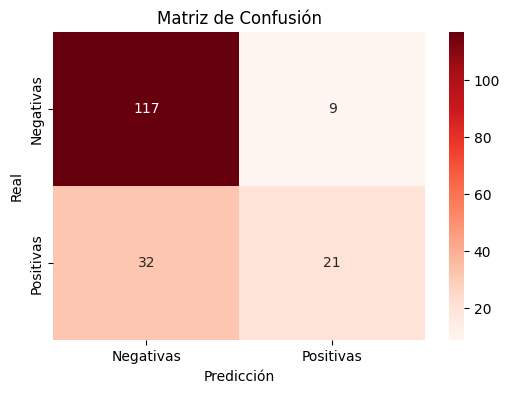

In [61]:
Precision_Omega(y_test, y_pred_test_Bernoulli)
Matriz_Confusion(y_test, y_pred_test_Bernoulli)

| Modelo        | Accuracy | Precision | Recall | F1 Score |
|---------------|----------|-----------|--------|----------|
| MultinomialNB | 0.8156   | 0.7273    | 0.6038 | 0.6598   |
| GaussianNB    | 0.8045   | 0.6875    | 0.6226 | 0.6535   |
| BernoulliNB   | 0.7709   | 0.7000    | 0.3962 | 0.5060   |


Análisis general
MultinomialNB obtuvo el mejor puntaje en accuracy, precision y F1 Score, lo cual sugiere que es el modelo más equilibrado.

GaussianNB tiene el recall más alto, lo que indica que detecta más casos positivos, aunque con algo menos de precisión.

BernoulliNB muestra un recall significativamente más bajo, lo que lo hace menos recomendable si es crucial detectar la mayor cantidad de positivos.

Paso 4: Otros Modelos

Accuracy: 0.8156
Precision: 0.6613
Recall: 0.7736
F1 Score: 0.7130


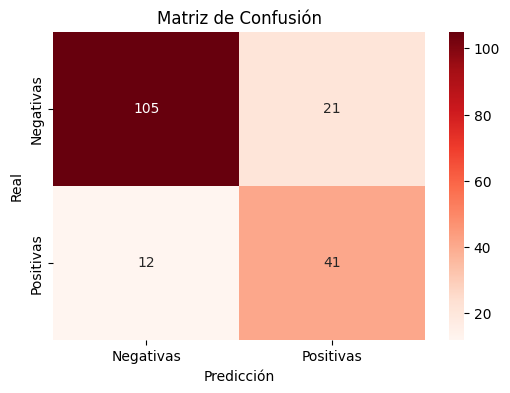

In [68]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)


Precision_Omega(y_test, y_pred_rf)
Matriz_Confusion(y_test, y_pred_rf)


| Modelo         | Accuracy | Precision | Recall | F1 Score |
|----------------|----------|-----------|--------|----------|
| Random Forest  | 0.8156   | 0.6613    | 0.7736 | 0.7130   |
| MultinomialNB  | 0.8156   | 0.7273    | 0.6038 | 0.6598   |


Ambos modelos tienen la misma precisión general (accuracy), pero se destacan en métricas distintas.

Random Forest tiene un recall bastante más alto, lo que indica que identifica mejor las opiniones positivas o negativas correctamente.

MultinomialNB ofrece mayor precisión, lo que significa que cuando predice una categoría, es más probable que acierte.

*** Paso 5: Guardar el modelo

In [62]:
from pickle import dump
dump(model_multi, open("naive_bayes_Predictor.sav", "wb"))